In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

In [2]:
images_oi = [a for a in os.listdir('.') if 'RGB' in a]
print(images_oi)

['RGB0299X.jpg', 'RGB0298X.jpg', 'RGB1162X.jpg', 'RGB0455X.jpg']


In [3]:
def get_stuff_from_dataframe(dataframe):
    
    paths   = np.array(dataframe[0])
    bboxs   = np.array(dataframe[[1,2,3,4]])
    classes = np.array(dataframe[5])
    
    return paths,bboxs,classes

In [4]:
annotations = pd.read_csv('annotation.csv',header=None)

annotations.T

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
0,RGB0000X.jpg,RGB0000X.jpg,RGB0000X.jpg,RGB0001X.jpg,RGB0001X.jpg,RGB0001X.jpg,RGB0002X.jpg,RGB0002X.jpg,RGB0002X.jpg,RGB0003X.jpg,...,RGB1149X.jpg,RGB1151X.jpg,RGB1152X.jpg,RGB1153X.jpg,RGB1155X.jpg,RGB1156X.jpg,RGB1158X.jpg,RGB1159X.jpg,RGB1160X.jpg,RGB1162X.jpg
1,171,234,304,152,222,295,154,219,285,152,...,217,215,202,215,268,250,276,292,298,262
2,339,340,340,336,339,339,336,340,335,328,...,307,368,375,321,335,375,340,304,317,353
3,210,270,341,201,272,339,209,271,337,213,...,288,285,295,294,343,346,339,349,359,349
4,380,379,376,369,371,370,393,392,389,383,...,364,439,435,387,389,453,402,360,387,424
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
predictions = pd.read_csv('predictions_baseline.csv',header=None)

predictions.T

,0,1,2,3,4,5,6,7,8,9,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761
0,RGB0508X.jpg,RGB0508X.jpg,RGB0508X.jpg,RGB0329X.jpg,RGB0329X.jpg,RGB0329X.jpg,RGB0207X.jpg,RGB0207X.jpg,RGB0207X.jpg,RGB0457X.jpg,...,RGB0810X.jpg,RGB0168X.jpg,RGB0168X.jpg,RGB0168X.jpg,RGB0883X.jpg,RGB0521X.jpg,RGB0521X.jpg,RGB0276X.jpg,RGB0276X.jpg,RGB0276X.jpg
1,281.516,242.463,301.596,303.39,135.789,234.14,240.055,300.105,175.926,162.012,...,242.624,208.541,294.64,238.964,282.533,211.481,270.424,283.152,242.788,148.748
2,325.56,321.763,322.438,331.339,328.951,337.903,337.74,334.464,335.149,356.153,...,339.076,342.408,337.491,334.947,341.192,391.164,336.253,407.688,363.881,335.673
3,290.226,259.553,311.103,335.445,167.567,257.065,265.645,318.982,207.124,184.569,...,266.249,221.004,318.661,268.524,310.603,278.419,318.45,319.475,261.225,159.453
4,352.558,352.362,351.227,364.901,363.3,351.997,365.149,360.007,348.115,372.944,...,355.054,378.359,377.96,374.687,368.817,445.17,370.119,425.897,387.613,361.699
5,5,-1,-1,2,2,2,4,4,4,4,...,9,1,1,1,7,6,6,4,4,4
6,0.856429,0.495574,0.394638,0.99715,0.985512,0.946936,0.986079,0.980115,0.97795,0.985718,...,0.993534,0.997429,0.99509,0.972709,0.998075,0.999722,0.997675,0.971919,0.971004,0.961122


In [6]:
paths,bboxs,classes = get_stuff_from_dataframe(annotations)
#paths,bboxs,classes = get_stuff_from_dataframe(predictions)

In [14]:
#image_path = np.random.choice(images_oi)

image_path = 'RGB1162X.jpg'
#image_path = 'RGB0455X.jpg'

#image_path = 'RGB0298X.jpg'
#image_path = 'RGB0299X.jpg'
image_path

'RGB1162X.jpg'

In [15]:
bboxs_oi = bboxs[paths == image_path]
bboxs_oi

array([[262, 353, 349, 424]])

In [16]:
classes_oi = classes[paths == image_path]
classes_oi

array([0])

h,w =  75 91


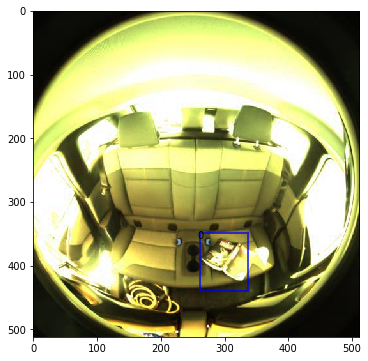

In [18]:
image = cv2.imread(image_path)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(image)

for class_oi,bbox_oi in zip(classes_oi,bboxs_oi):
    x_min,x_max,y_min,y_max = bbox_oi
    h,w = y_max-y_min,x_max-x_min
    print('h,w = ',h,w)
    bbox = patches.Rectangle((x_min,y_min),h,w,facecolor='none',linewidth=2,edgecolor='b',alpha=0.7)
    ax.add_patch(bbox)
    
    ax.text(x_min,x_max,str(class_oi),horizontalalignment='center',verticalalignment='center')
    
plt.show()